In [1]:
import json
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
dataset_path = "/home/myurachinskiy/YSDA/ML2/ml2-papers/data/arxivData.json"

In [3]:
with open(dataset_path) as f:
    dataset_json = json.load(f)

len(dataset_json)

41000

In [4]:
dataset_json[0]

{'author': "[{'name': 'Ahmed Osman'}, {'name': 'Wojciech Samek'}]",
 'day': 1,
 'id': '1802.00209v1',
 'link': "[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1802.00209v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1802.00209v1', 'type': 'application/pdf', 'title': 'pdf'}]",
 'month': 2,
 'summary': 'We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joint embedding of visual and\ntextual features and enables the model to reason relations between several\nparts of the image and question. Our single model outperforms the first place\nwinner on the VQA 1.0 dataset, performs within margin to the current\nstate-of-the-art ensemble model. We also experiment with replacing attention\nmechanisms in other state-of-the-art models with our implementation and show\nincreased accuracy. In both cases, our recurrent attention

In [7]:
lens, tags = [], []

for sample in dataset_json:
    sample_tags = eval(sample['tag'])
    lens.append(len(sample_tags))
    for tag in sample_tags:
        tags.append(tag['term'])

counter = Counter(tags)
counter.most_common(10)

[('cs.CV', 13902),
 ('cs.LG', 13735),
 ('cs.AI', 10481),
 ('stat.ML', 10326),
 ('cs.CL', 6417),
 ('cs.NE', 3819),
 ('cs.IR', 1443),
 ('math.OC', 1020),
 ('cs.RO', 973),
 ('cs.LO', 643)]

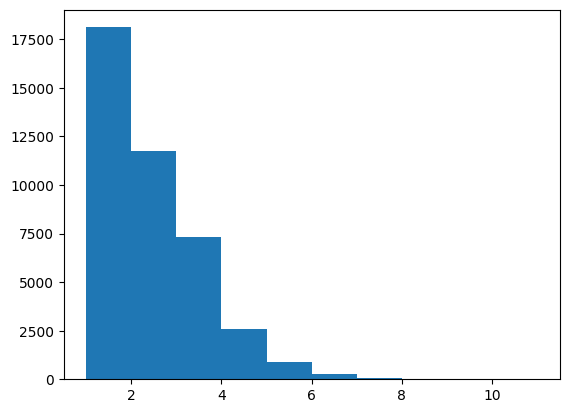

In [8]:
plt.hist(lens, bins=10);

In [9]:
len(counter)

2293

Sum count: 77649
Num classes: 172


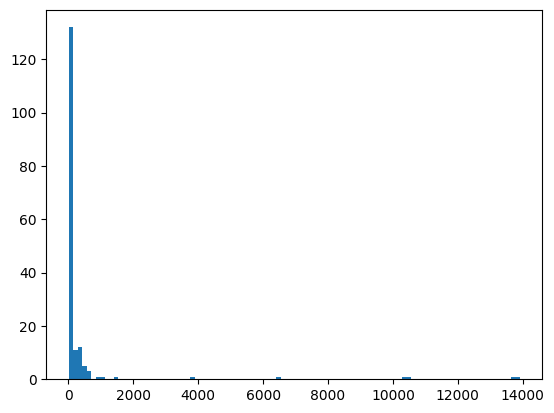

In [33]:
counts = list(counter.values())
sub_counter = {
    name: count for name, count in counter.items()
    if 8 <= count
}
counts = sub_counter.values()
print('Sum count:', sum(counts))
print('Num classes:', len(counts))
plt.hist(counts, bins=100);

In [34]:
lens, texts, tags = [], [], []

for sample in dataset_json:
    texts.append(sample['summary'])
    tags.append([])
    for tag in eval(sample['tag']):
        if (term := tag['term']) in sub_counter:
            tags[-1].append(term)
    lens.append(len(tags[-1]))

len(texts)

41000

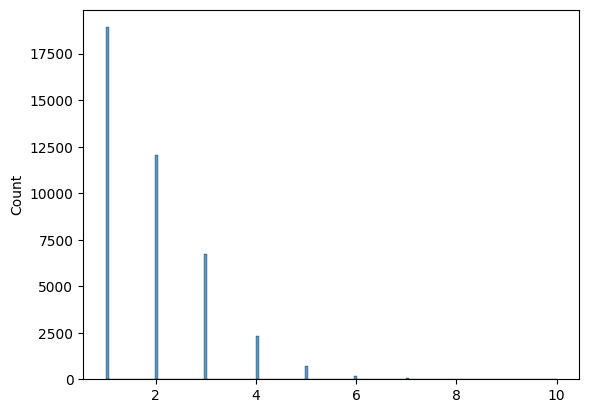

In [35]:
sns.histplot(x=lens);

In [36]:
label_transform = MultiLabelBinarizer()

labels = label_transform.fit_transform(tags)
labels.shape

(41000, 172)

In [37]:
(labels.sum(axis=1) == 0).sum()

0

In [41]:
mlb = MultiLabelBinarizer()
mlb.fit_transform([(1, 2), ()])

array([[1, 1],
       [0, 0]])

TypeError: unhashable type: 'list'